Found 655 images belonging to 6 classes.
Epoch 1/50
6/6 [==============================] - 29s 5s/step - loss: 2.0457 - accuracy: 0.1496 - val_loss: 1.7898 - val_accuracy: 0.1667
Epoch 2/50
6/6 [==============================] - 35s 6s/step - loss: 1.7916 - accuracy: 0.1649 - val_loss: 1.7901 - val_accuracy: 0.1746
Epoch 3/50
6/6 [==============================] - 29s 5s/step - loss: 1.7935 - accuracy: 0.1756 - val_loss: 1.7918 - val_accuracy: 0.1561
Epoch 4/50
6/6 [==============================] - 34s 6s/step - loss: 1.7963 - accuracy: 0.1634 - val_loss: 1.7896 - val_accuracy: 0.1693
Epoch 5/50
6/6 [==============================] - 31s 5s/step - loss: 1.7824 - accuracy: 0.2000 - val_loss: 2.8327 - val_accuracy: 0.1693
Epoch 6/50
6/6 [==============================] - 36s 6s/step - loss: 1.8306 - accuracy: 0.1908 - val_loss: 1.7779 - val_accuracy: 0.2540
Epoch 7/50
6/6 [==============================] - 37s 6s/step - loss: 1.7721 - accuracy: 0.1878 - val_loss: 2.2963 - val_accuracy: 

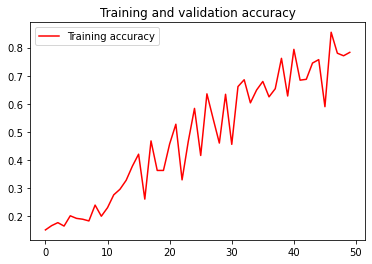

<Figure size 432x288 with 0 Axes>

In [1]:
#from typing_extensions import final
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import PIL
import cv2
from sklearn.metrics import classification_report
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.engine import training
from tensorflow.keras.applications import MobileNetV2
from tensorflow.python.keras.engine.input_layer import Input
training_data=[]
DataDirectory="D:/Device-Control-Using-OpenCV-and-ML/Device-Control-Using-OpenCV-and-ML/dataset/original_sign/"
Classes=["0","1","2","3","4","5"]
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = training_datagen.flow_from_directory(
	DataDirectory,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#history= model.fit()
history = model.fit(train_generator, epochs=50, steps_per_epoch=6, validation_data = train_generator, verbose = 1, validation_steps=3)
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
accuracy=history.history['accuracy']

In [7]:
accuracy

[0.2865947484970093,
 0.3174113929271698,
 0.36055469512939453,
 0.34514638781547546,
 0.3882896900177002,
 0.32665640115737915,
 0.3235747218132019,
 0.3174113929271698,
 0.36671802401542664,
 0.3944530189037323,
 0.33281973004341125,
 0.36055469512939453,
 0.32049307227134705,
 0.32665640115737915,
 0.41602465510368347,
 0.4653312861919403,
 0.5208012461662292,
 0.6101694703102112,
 0.6009244918823242,
 0.526964545249939,
 0.650231122970581,
 0.6810477375984192,
 0.7457627058029175,
 0.6255778074264526,
 0.9337441921234131]

<Figure size 432x288 with 0 Axes>

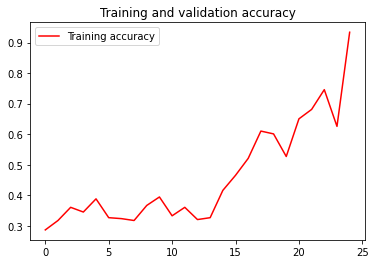

<Figure size 432x288 with 0 Axes>

In [8]:
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()